In [1]:
from raytracing import *
from polarization import *
from plotfuncs import *

# Polarization Tick Plots

### Set parameter values

In [2]:
spin = 0.5 #dimensionless spin of BH
r = 6 #radius of equatorial emission (in M)
theta = 17*np.pi/180 #inclination angle
mbar = 0 #which subimage
NSEG = 20 #number of points in varphi
bvec = [0,0,1.0] #magnetic field in local frame
chi = -np.pi/2 #boost angle
boost = 0.3 #boost magnitude

### Ray-trace

In [3]:
#create array of screen phi values
dphi = 2*np.pi / NSEG 
phivals = np.arange(0, 2*np.pi, dphi)

#create arrays for magnitude and angle of polarization at each screen point
magvals = []
anglevals = []
bvals = []

#now ray-trace
for varphi in phivals:
    b = findb(r, varphi, spin, theta, mbar) #compute impact parameter
    bvals.append(b)
    mag, angle = getevec(b, varphi, r, spin, theta, boost, chi, bvec) #compute polarization 
    magvals.append(mag)
    anglevals.append(angle)
    cosangle = np.cos(angle)
    sinangle = np.sin(angle)
    xalpha = b * np.cos(varphi)
    ybeta = b * np.sin(varphi)
    
magvals = np.array(magvals)*10 #might need to multiply by a big number to make more visible (doesn't affect angle)

### Plot

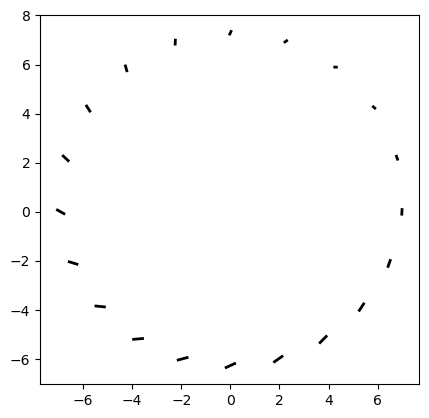

In [4]:
#generate the points to plot in the figure
WIDTH = 0.3
xvals, yvals = tickfunc(bvals, phivals, magvals, anglevals, WIDTH)
fig, ax = plt.subplots(1)
[ax.plot(xvals[i], yvals[i], linewidth = 2, color='k') for i in range(len(xvals))]
ax.set_aspect('equal')

# QU Loops

### Set parameters

In [5]:
spin = 0.5 #dimensionless spin of BH
r = 6 #radius of equatorial emission (in M)
theta = 17*np.pi/180 #inclination angle
mbar = 0 #which subimage
NSEG = 100 #number of points in varphi
bvec = [0,0,1.0] #magnetic field in local frame
chi = -np.pi/2 #boost angle

### Compute boost (Keplerian for now but could be altered)

In [6]:
boost = (spin**2 - 2*np.abs(spin)*np.sqrt(r) + r**2) / (np.sqrt(spin**2 + (r-2)*r) * (np.abs(spin) + r**(3/2)))

### Ray-trace

In [7]:
#create array of screen phi values
dphi = 2*np.pi / NSEG 
phivals = np.arange(0, 2*np.pi, dphi)

#first find impact parameters
bvals = [findb(r, varphi, spin, theta, mbar) for varphi in phivals]

#next compute screen polarization - setting "normalret=False" returns individual components
evecs = np.transpose(np.array([getevec(bvals[l], phivals[l], r, spin, theta, boost, chi, bvec, normalret=False) for l in range(len(phivals))]))
ealpha = evecs[0]
ebeta = evecs[1]

#compute Stokes parameters
stokesqtot = -(ealpha**2 - ebeta**2)
stokesutot = -2 * ealpha * ebeta

Text(0.5, 0, 'Q')

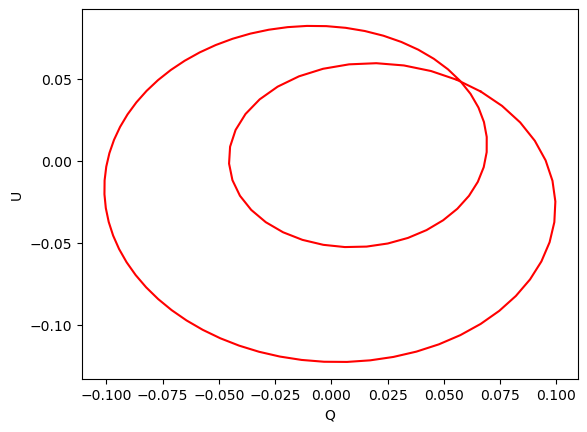

In [8]:
plt.plot(stokesqtot, stokesutot, color='r')
plt.plot([stokesqtot[-1], stokesqtot[0]], [stokesutot[-1], stokesutot[0]], color='r')
plt.ylabel('U')
plt.xlabel('Q')